In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys, math
%matplotlib inline

# 1. Problem Statement

## The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

## Data Dictionary

| Variable | Definition |
| --- | --- |
| ID | UniqueID |
| Estimated_Insects_Count | Estimated insects count per square meter |
| Crop_Type | Category of Crop(0,1) |
| Soil_Type | Category of Soil (0,1) |
| Pesticide_Use_Category | Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) |
| Number_Doses_Week | Number of doses per week |
| Number_Weeks_Used | Number of weeks used |
| Number_Weeks_Quit | Number of weeks quit |
| Season | Season Category (1,2,3) |
| Crop_Damage | Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides) |![image.png](attachment:image.png)

# 2. Data Exploration

In [2]:
train_data = pd.read_csv('../Data/train_yaOffsB.csv')
test_data = pd.read_csv('../Data/test_pFkWwen.csv')
sample_submission = pd.read_csv('../Data/sample_submission_O1oDc4H.csv')

In [3]:
print(f'Training data has {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'Test data has {test_data.shape[0]} rows and {test_data.shape[1]} columns')
print(f'Submission data has {sample_submission.shape[0]} rows and {sample_submission.shape[1]} columns')

Training data has 88858 rows and 10 columns
Test data has 59310 rows and 9 columns
Submission data has 59310 rows and 2 columns


In [4]:
train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
sample_submission.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


## Constants

In [12]:
ID = 'ID'
target = 'Season'

In [17]:
categorical_cols = ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season']

## Univariate Analysis

In [ ]:
os.makedirs('../Plots/Univariate Analysis', exist_ok=True)

FileNotFoundError: [Errno 2] No such file or directory: '../Plots/Univariate Analysis/with_Estimated_Insects_Count.png'

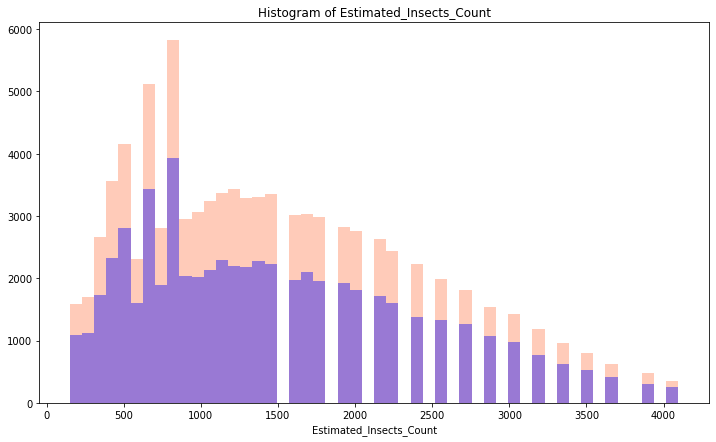

In [21]:
for column in train_data.columns:
    if (column not in categorical_cols) & (column != ID) & (column != target) :
        plt.figure(figsize=(12,7))
        g1 = sns.distplot(train_data[column], kde=False, color='coral')
        g2 = sns.distplot(test_data[column], kde=False, color='blue')
        g1.set_title(f'Histogram of {column}')
        plt.savefig(f'../Plots/Univariate Analysis/with_{column}', dpi=300)

In [20]:
list(ID,target)

TypeError: list expected at most 1 argument, got 2